# The transfer function

**Analytic form of transfer function:** In certain cases the transfer function is available as an analytic expression. One common transfer function used for resistance temperature sensors (to be discussed in Chapter 3) is the Callendar– Van Duzen equation.It gives the resistance of the sensor at a temperature T as

$$R(T)=R_{0}(1+AT+BT^2-100CT^3+CT^4) \hspace{5mm} [\Omega]$$


 where the constants A, B, and C are determined by direct measurement of resistance for the specific material used in the sensor and $R_{0}$ is the temperature of the sensor at 0$^{\circ}$C. Typical temperatures used for calibration are the oxygen point (-182.962 $^{\circ}$C; the equilibrium between liquid oxygen and its vapor), the triple point of water (0.01 $^{\circ}$C; the point of equilibrium temperature between ice, liquid water, and water vapor), the steam point (100 $^{\circ}$C; the equilibrium point between water and vapor), the zinc point (419.58 $^{\circ}$C; the equilibrium point between solid and liquid zinc), the silver point (961.93 $^{\circ}$C), and the gold point (1064.43 $^{\circ}$C), as well as others. 

Consider a platinum resistance sensor with a nominal resistance of 25 $\Omega$ at 0$^{\circ}$C. To calibrate the sensor its resistance is measured at the oxygen point as 6.2 $\Omega$, at the steam point as 35.6 $\Omega$, and at the zinc point as 66.1 $\Omega$. Calculate the coefficients A, B, and C and plot the transfer function between -200 $^{\circ}$C and 600 $^{\circ}$C.

### Solution

To get the values of the constants A, B and C, we have to enumerate the given points to solve the 3x3 equation system.

$P\ (Temperature;Resistance)$ 

_1._ $P_{1}(-182,962^{\circ}C;\hspace{1mm}6,2 \Omega)$

_2._ $P_{2}(100^{\circ}C;\hspace{1mm}35,6 \Omega)$

_3._ $P_{3}(419,58 ^{\circ}C;\hspace{1mm}66,1 \Omega)$

In [6]:
import matplotlib.pyplot as plt
from numpy import *
import numpy as np
from math import *
%matplotlib inline

#Definimos el valor de R0
R0 = 25;
#Definimos los puntos dados por el problema
T1 = -182.962; R1 = 6.2;
T2 = 100; R2 = 35.6;
T3 = 419.58; R3 = 66.1;

Reformulating Callendar-Van Duzen equation:

$$\frac{R(T)}{R_0}-1 = AT+BT^2+C(T-100)T^3$$

Based on this, we can present the 3x3 matrix based on the points described above, and thus solve the system $Mx = b$.

In [17]:
M = np.array([[T1, (T1**2), (-100*(T1**3)+(T1**4))], 
    [T2, (T2**2), (-100*(T2**3)+(T2**4))], 
    [T3, (T3**2), (-100*(T3**3)+(T3**4))]]);
b = np.array([[(R1/R0)-1],[(R2/R0)-1],[(R3/R0)-1]]);
#Procedemos a hallar la inversa de la matriz M y multiplicarla por b
x = np.dot((linalg.inv(M)),b);
print('x = ',x);
A = x[0]; B = x[1]; C = x[2];
print('A = ',A,'B = ',B,'C = ',C);

x =  [[ 4.15969065e-03]
 [ 8.03093522e-07]
 [-1.02814817e-11]]
A =  [0.00415969] B =  [8.03093522e-07] C =  [-1.02814817e-11]


Once we get the values of constants A, B and C; we can proceed to define the equation and plot it.

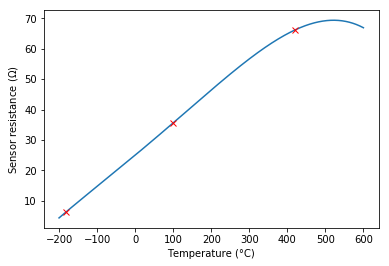

In [60]:
#Definimos el intervalo para realizar el plot
T = np.arange(-200, 601, 1);
#Definimos la ecuación de Callendar-Van Dozen
R = R0*(1+A[0]*T+B[0]*(T)**2+C[0]*(T-100)*(T)**3);
#Procedemos a realizar el plot
plt.plot(T,R,T1,R1,'rx',T2,R2,'rx',T3,R3,'rx');
plt.ylabel('Sensor resistance ($\Omega$)');
plt.xlabel('Temperature (°C)');
plt.show();

Finally, we can observe the resulting graph from the Callendar-Van Dozen equation for a platinum resistance sensor, in the illustrated graph  with the 3 initial points given by the problem of which we calculate the constants of the equation.

**Authors:**

Yithzak Alarcón - T00045029

Angie Vitola - T00045045